In [116]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_csv('/content/_cafe_sales.csv')

In [118]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [119]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [121]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [122]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9862 non-null   object        
 3   Price Per Unit    9821 non-null   object        
 4   Total Spent       9827 non-null   object        
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 625.1+ KB


In [17]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


In [15]:
# finding out
df['Transaction Date'].isnull().sum()

np.int64(159)

In [16]:
df['Transaction Date']

,Transaction Date
0,2023-09-08
1,2023-05-16
2,2023-07-19
3,2023-04-27
4,2023-06-11
...,...
9995,2023-08-30
9996,2023-06-02
9997,2023-03-02
9998,2023-12-02


In [14]:
df.duplicated().sum()

np.int64(0)

In [129]:
print(df["Transaction Date"].unique())

<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 00:00:00',
 '2023-07-03 00:00:00']
Length: 365, dtype: datetime64[ns]


In [124]:
df["Transaction Date"] = df["Transaction Date"].replace({"ERROR": None, "UNKNOWN": None})
df["Transaction Date"] = df["Transaction Date"].fillna(method="ffill")

<ipython-input-124-4b516911fa79>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Transaction Date"] = df["Transaction Date"].fillna(method="ffill")  # Uses previous valid value


In [125]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

In [126]:
df['Location'].mode()

,Location
0,Takeaway


In [127]:
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [128]:
df["Item"].fillna("Unknown Item", inplace=True)

<ipython-input-128-863386624cfe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item"].fillna("Unknown Item", inplace=True)


In [42]:
print(df["Price Per Unit"].dtype)

float64


In [41]:
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")

In [44]:
df["Price Per Unit"].fillna(df["Price Per Unit"].median(), inplace=True)

<ipython-input-44-f75f30102d57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Price Per Unit"].fillna(df["Price Per Unit"].median(), inplace=True)


In [45]:
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

In [46]:
df["Total Spent"].fillna(df["Total Spent"].median(), inplace=True)

<ipython-input-46-047f02de7e3d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Spent"].fillna(df["Total Spent"].median(), inplace=True)


In [49]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

In [50]:
df["Quantity"].fillna(df["Quantity"].median(), inplace=True)

<ipython-input-50-bbc43f6d92fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quantity"].fillna(df["Quantity"].median(), inplace=True)


In [52]:
df["Payment Method"].fillna(df["Payment Method"].mode()[0], inplace=True)  # Uses most common payment method

<ipython-input-52-b0785d8ec743>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Payment Method"].fillna(df["Payment Method"].mode()[0], inplace=True)  # Uses most common payment method


In [53]:
def missing_percentage(df):
    missing_data = df.isnull().sum()  # Count missing values per column
    total_rows = len(df)  # Total number of rows
    percent_missing = (missing_data / total_rows) * 100  # Convert to percentage

    result = pd.DataFrame({
        "Column Name": df.columns,
        "Missing Values": missing_data,
        "Percentage Missing": percent_missing
    })

    return result.sort_values(by="Percentage Missing", ascending=False)  # Sort for better visibility

# Usage
missing_report = missing_percentage(df)
print(missing_report)

                       Column Name  Missing Values  Percentage Missing
Transaction ID      Transaction ID               0                 0.0
Item                          Item               0                 0.0
Quantity                  Quantity               0                 0.0
Price Per Unit      Price Per Unit               0                 0.0
Total Spent            Total Spent               0                 0.0
Payment Method      Payment Method               0                 0.0
Location                  Location               0                 0.0
Transaction Date  Transaction Date               0                 0.0


In [55]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply function to detect outliers in numerical columns
outlier_price = find_outliers_iqr(df, "Price Per Unit")
outlier_total_spent = find_outliers_iqr(df, "Total Spent")

print(f"Outliers in Price Per Unit:\n{outlier_price}")
print(f"Outliers in Total Spent:\n{outlier_total_spent}")

Outliers in Price Per Unit:
Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []
Outliers in Total Spent:
     Transaction ID          Item  Quantity  Price Per Unit  Total Spent  \
10      TXN_2548360         Salad       5.0             5.0         25.0   
51      TXN_6342161         Salad       5.0             5.0         25.0   
52      TXN_8914892       UNKNOWN       5.0             5.0         25.0   
96      TXN_5220895         Salad       5.0             5.0         25.0   
100     TXN_9517146  Unknown Item       5.0             5.0         25.0   
...             ...           ...       ...             ...          ...   
9791    TXN_1232346         Salad       5.0             5.0         25.0   
9805    TXN_9506076         Salad       5.0             5.0         25.0   
9879    TXN_6393305         Salad       5.0             5.0         25.0   
9908    TXN_8922585         Salad       5.0   

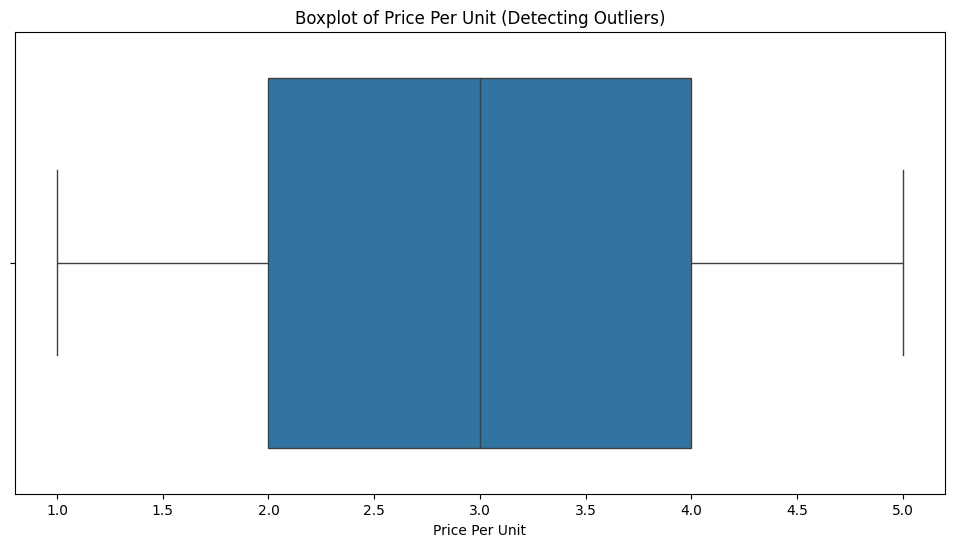

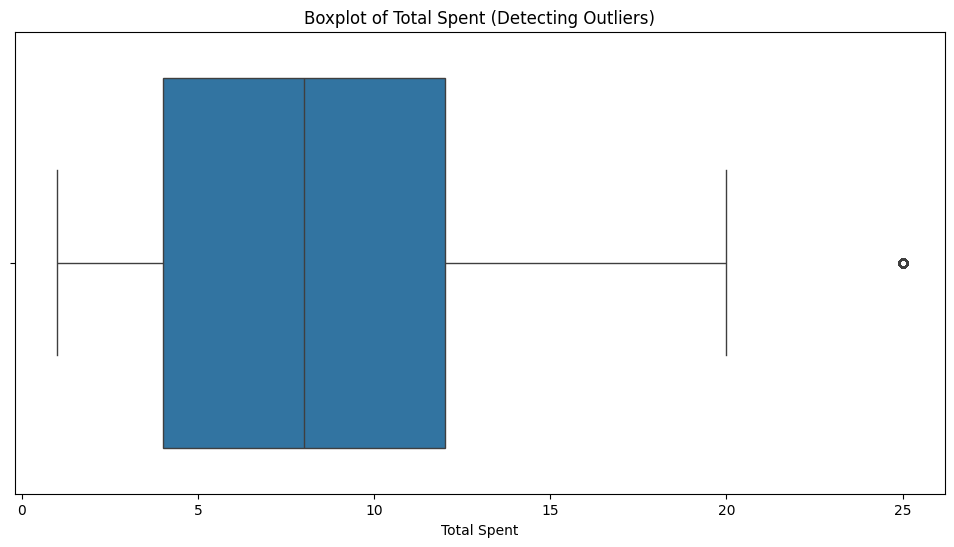

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Boxplot for Price Per Unit
sns.boxplot(x=df["Price Per Unit"])
plt.title("Boxplot of Price Per Unit (Detecting Outliers)")
plt.xlabel("Price Per Unit")
plt.show()

# Boxplot for Total Spent
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Total Spent"])
plt.title("Boxplot of Total Spent (Detecting Outliers)")
plt.xlabel("Total Spent")
plt.show()

In [59]:
# Find the upper threshold using IQR
Q1 = df["Total Spent"].quantile(0.25)
Q3 = df["Total Spent"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Show transactions above the upper bound (potential outliers)
outliers = df[df["Total Spent"] > upper_bound]
print(outliers)


     Transaction ID          Item  Quantity  Price Per Unit  Total Spent  \
10      TXN_2548360         Salad       5.0             5.0         25.0   
51      TXN_6342161         Salad       5.0             5.0         25.0   
52      TXN_8914892       UNKNOWN       5.0             5.0         25.0   
96      TXN_5220895         Salad       5.0             5.0         25.0   
100     TXN_9517146  Unknown Item       5.0             5.0         25.0   
...             ...           ...       ...             ...          ...   
9791    TXN_1232346         Salad       5.0             5.0         25.0   
9805    TXN_9506076         Salad       5.0             5.0         25.0   
9879    TXN_6393305         Salad       5.0             5.0         25.0   
9908    TXN_8922585         Salad       5.0             5.0         25.0   
9971    TXN_6120851         Salad       5.0             5.0         25.0   

      Payment Method  Location Transaction Date  
10              Cash  Takeaway       

In [61]:
# As we know our data have "Unkown" and "Error" in it's columns the best approch i could think of is to replace them with other , other location and unkown method
df["Item"].replace("UNKNOWN", "Other", inplace=True)
df["Location"].replace("UNKNOWN", "Other Location", inplace=True)
df["Payment Method"].replace("ERROR", "Unknown Method", inplace=True)

<ipython-input-61-7490f28228c6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item"].replace("UNKNOWN", "Other", inplace=True)
<ipython-input-61-7490f28228c6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [64]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Other',
       'Sandwich', 'Unknown Item', 'ERROR', 'Juice', 'Tea'], dtype=object)

In [62]:
print(df[(df["Item"] == "UNKNOWN") | (df["Item"] == "Unknown Item") |
         (df["Location"] == "UNKNOWN") | (df["Payment Method"] == "ERROR")])

     Transaction ID          Item  Quantity  Price Per Unit  Total Spent  \
8       TXN_4717867  Unknown Item       5.0             3.0         15.0   
30      TXN_1736287  Unknown Item       5.0             2.0         10.0   
61      TXN_8051289  Unknown Item       1.0             3.0          3.0   
72      TXN_6044979  Unknown Item       1.0             1.0          1.0   
89      TXN_4132730  Unknown Item       5.0             1.0          5.0   
...             ...           ...       ...             ...          ...   
9820    TXN_8751702  Unknown Item       5.0             3.0         15.0   
9855    TXN_3740505  Unknown Item       2.0             1.5          3.0   
9876    TXN_3105633  Unknown Item       1.0             2.0          2.0   
9885    TXN_4659954  Unknown Item       3.0             4.0         12.0   
9996    TXN_9659401  Unknown Item       3.0             3.0          3.0   

      Payment Method  Location Transaction Date  
8     Digital Wallet  Takeaway       

In [67]:
import numpy as np

# Calculate IQR
Q1 = df["Total Spent"].quantile(0.25)
Q3 = df["Total Spent"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[df["Total Spent"] > upper_bound]
print(outliers)  # Display extreme values

     Transaction ID          Item  Quantity  Price Per Unit  Total Spent  \
10      TXN_2548360         Salad       5.0             5.0         25.0   
51      TXN_6342161         Salad       5.0             5.0         25.0   
52      TXN_8914892         Other       5.0             5.0         25.0   
96      TXN_5220895         Salad       5.0             5.0         25.0   
100     TXN_9517146  Unknown Item       5.0             5.0         25.0   
...             ...           ...       ...             ...          ...   
9791    TXN_1232346         Salad       5.0             5.0         25.0   
9805    TXN_9506076         Salad       5.0             5.0         25.0   
9879    TXN_6393305         Salad       5.0             5.0         25.0   
9908    TXN_8922585         Salad       5.0             5.0         25.0   
9971    TXN_6120851         Salad       5.0             5.0         25.0   

      Payment Method        Location Transaction Date  
10              Cash        Tak

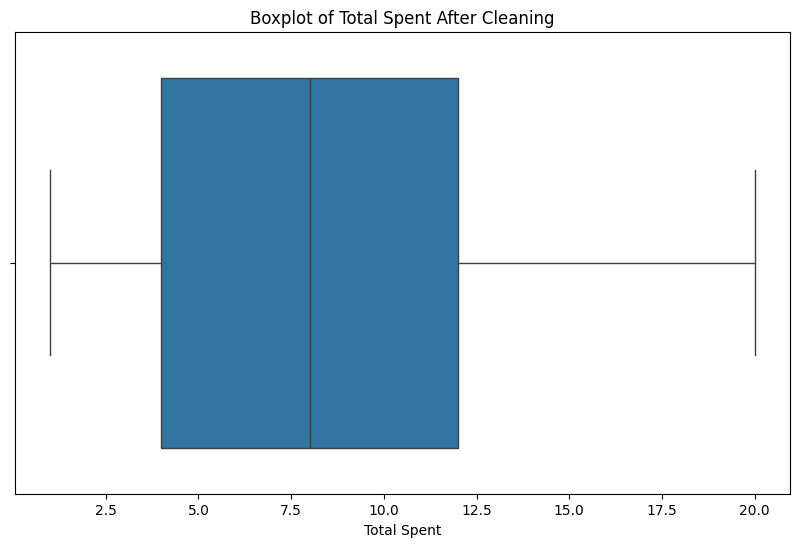

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Total Spent to visualize outliers again
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Total Spent"])
plt.title("Boxplot of Total Spent After Cleaning")
plt.xlabel("Total Spent")
plt.show()

In [69]:
print(df["Total Spent"].describe())  # Summary stats

count    10000.00000
mean         8.87795
std          5.86059
min          1.00000
25%          4.00000
50%          8.00000
75%         12.00000
max         25.00000
Name: Total Spent, dtype: float64


In [70]:
# Since the max vaalue is 25 and it is a vlid transaction so i will cap this value at 20 .
df["Total Spent"] = np.where(df["Total Spent"] > 20, 20, df["Total Spent"])

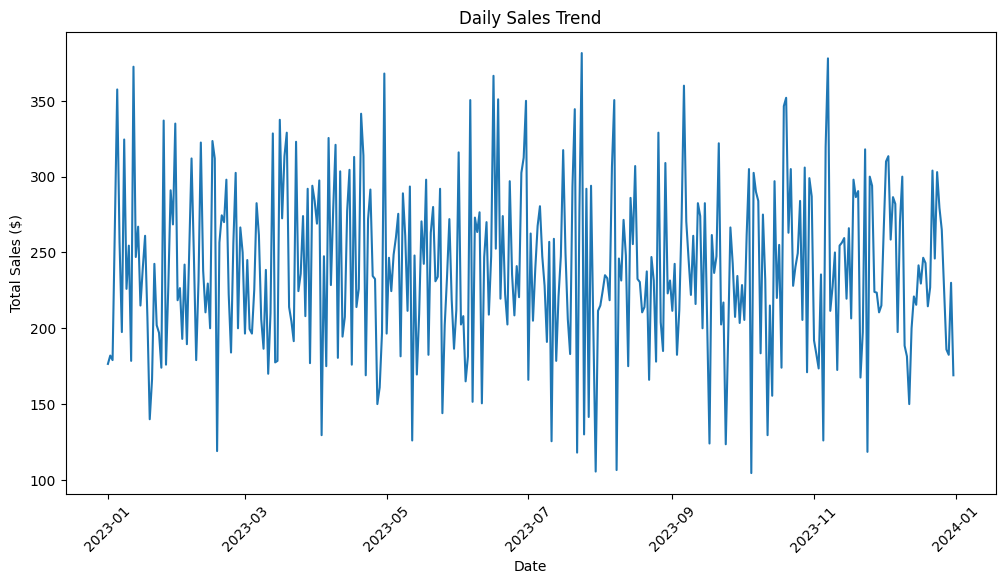

In [72]:
# Aggregate sales by date
daily_sales = df.groupby("Transaction Date")["Total Spent"].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

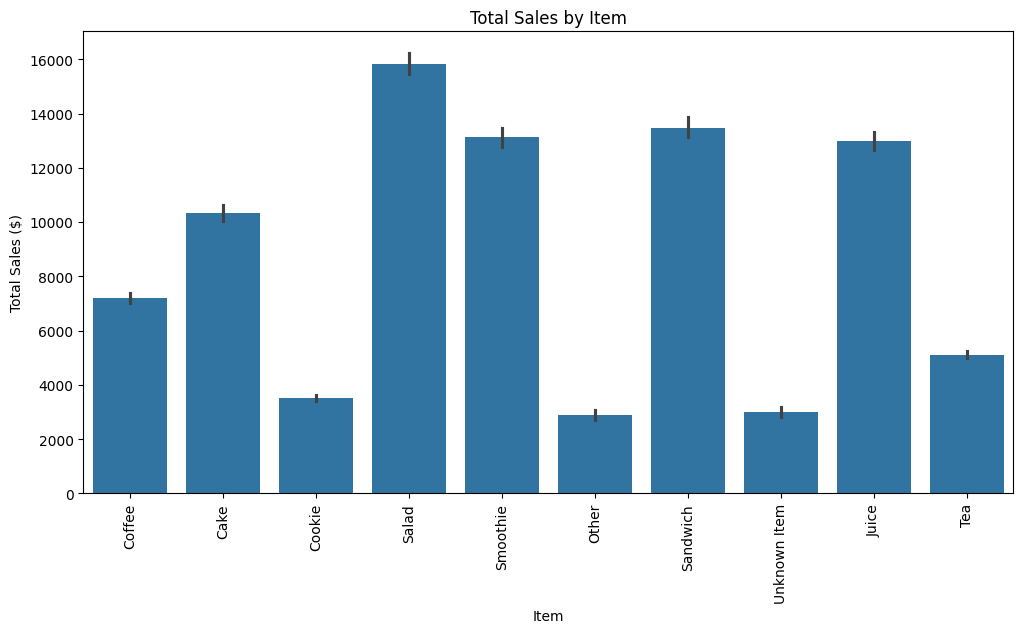

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Item"], y=df["Total Spent"], estimator=sum)
plt.title("Total Sales by Item")
plt.xlabel("Item")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)
plt.show()

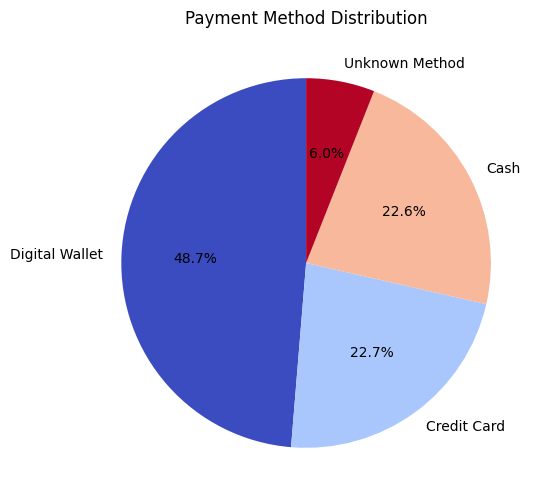

In [90]:
plt.figure(figsize=(8, 6))
df["Payment Method"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="coolwarm")
plt.title("Payment Method Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()

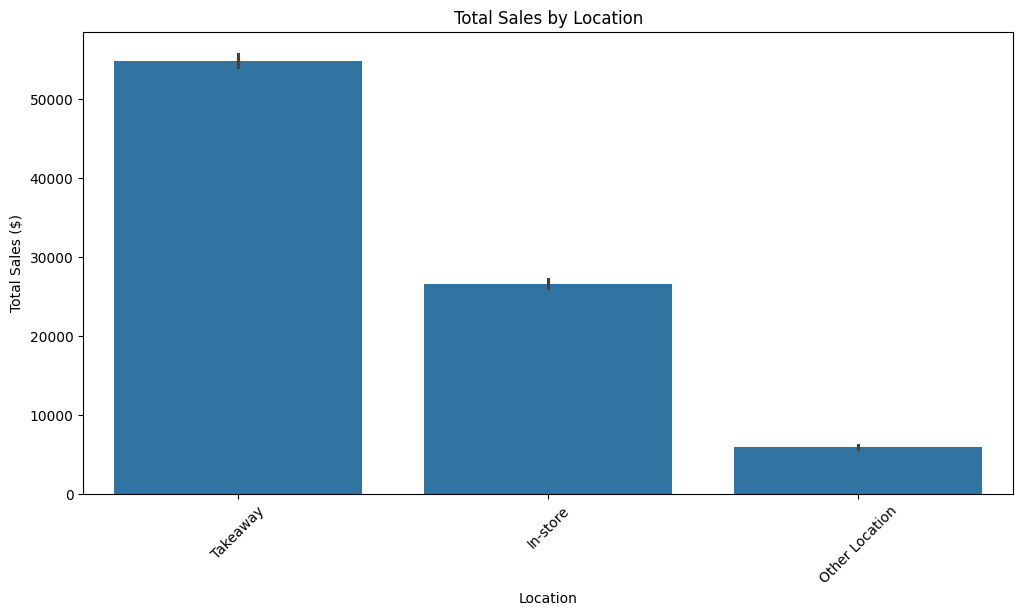

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Location"], y=df["Total Spent"], estimator=sum)
plt.title("Total Sales by Location")
plt.xlabel("Location")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

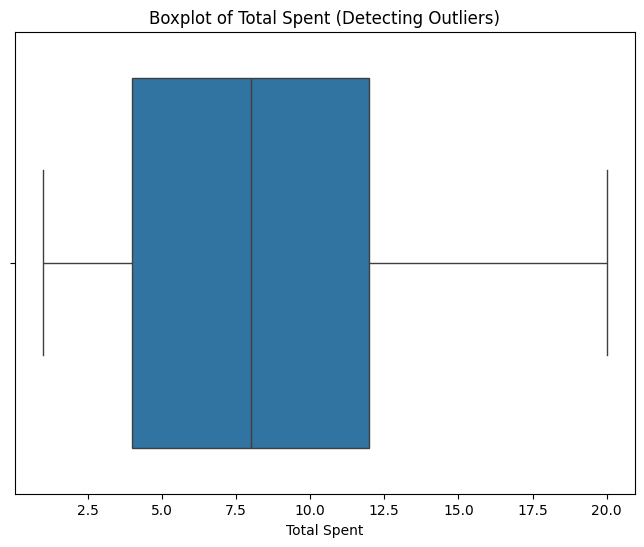

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Total Spent"])
plt.title("Boxplot of Total Spent (Detecting Outliers)")
plt.xlabel("Total Spent")
plt.show()

In [87]:
df["Item"] = df["Item"].replace("ERROR", df["Item"].mode()[0])  # Use most frequent item

In [92]:
print(df["Item"].unique())  # Check updated Item values
print(df["Location"].unique())  # Check Location values
print(df["Payment Method"].unique())  # Verify Payment Method fixes

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'Other' 'Sandwich'
 'Unknown Item' 'Juice' 'Tea']
['Takeaway' 'In-store' 'Other Location']
['Credit Card' 'Cash' 'Unknown Method' 'Digital Wallet']


In [93]:
df["Day of Week"] = df["Transaction Date"].dt.day_name()  # Example: "Monday"
df["Month"] = df["Transaction Date"].dt.month  # Example: 1 for January
df["Is Weekend"] = df["Transaction Date"].dt.weekday >= 5  # True if Saturday/Sunday

In [95]:
df["Total Quantity Spent"] = df["Quantity"] * df["Price Per Unit"]

In [99]:
df["Item Category"] = df["Item"].apply(lambda x:
    "Beverage" if x in ["Coffee", "Tea", "Juice", "Smoothie"]
    else "Food" if x in ["Cake", "Cookie", "Sandwich", "Salad"]
    else "Other")

In [106]:
df["Is Best Selling Item"] = df["Item"].apply(lambda x: "Best Seller" if x in ["Salad", "Juice", "Sandwich"] else "Not a Best Seller")

In [108]:
df["Customer Type"] = df.groupby("Transaction ID")["Transaction ID"].transform("count")
df["Customer Type"] = df["Customer Type"].apply(lambda x: "Returning" if x > 1 else "New")

In [112]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Hour,Day of Week,Month,Is Weekend,Total Quantity Spent,Item Category,Is Best Seller,Is Best Selling Item,Customer Type
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,0,Friday,9,False,4.0,Beverage,Not a Best Seller,Not a Best Seller,New
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0,Tuesday,5,False,12.0,Food,Not a Best Seller,Not a Best Seller,New
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,0,Wednesday,7,False,4.0,Food,Not a Best Seller,Not a Best Seller,New
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown Method,Other Location,2023-04-27,0,Thursday,4,False,10.0,Food,Best Seller,Best Seller,New
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,0,Sunday,6,True,4.0,Beverage,Not a Best Seller,Not a Best Seller,New


In [113]:
categorical_columns = ["Item", "Payment Method", "Location"]

In [114]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

In [115]:
print(df_encoded.head())

  Transaction ID  Quantity  Price Per Unit  Total Spent Transaction Date  \
0    TXN_1961373       2.0             2.0          4.0       2023-09-08   
1    TXN_4977031       4.0             3.0         12.0       2023-05-16   
2    TXN_4271903       4.0             1.0          8.0       2023-07-19   
3    TXN_7034554       2.0             5.0         10.0       2023-04-27   
4    TXN_3160411       2.0             2.0          4.0       2023-06-11   

   Hour Day of Week  Month  Is Weekend  Total Quantity Spent  ...  \
0     0      Friday      9       False                   4.0  ...   
1     0     Tuesday      5       False                  12.0  ...   
2     0   Wednesday      7       False                   4.0  ...   
3     0    Thursday      4       False                  10.0  ...   
4     0      Sunday      6        True                   4.0  ...   

  Item_Smoothie Item_Tea Item_Unknown Item Payment Method_Cash  \
0         False    False             False               False

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Initialize encoder
# encoder = OneHotEncoder(handle_unknown="ignore")

# # Apply encoding
# encoded_data = encoder.fit_transform(df[["Item", "Payment Method", "Location"]])

# # Convert result to DataFrame with meaningful column names
# import pandas as pd
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Item", "Payment Method", "Location"]))

# # Merge with original dataset
# df = pd.concat([df, encoded_df], axis=1)